# Pre-Class 10.2

## Exercise 14
Sampling bias for bus waiting times

In [139]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy

plt.style.use('ggplot')

In [130]:
# Constant interarrival time - every 10 minutes
gamma = 1/10 # Arrives every 10 minutes, or 1/10 per minute
n_trials = 10000

record_times = []

for i in range(n_trials):
    passenger_arrival = np.random.uniform()
    bus_arrival = st.expon.ppf(passenger_arrival, scale=1/gamma)
    record_times.append(bus_arrival)

np.mean(record_times)

10.036786003020904

In [133]:
# Changed interarrival time
gamma_org = 1/10 # Arrives every 10 minutes, or 1/10 per minute
n_trials = 10000

record_times = []

for i in range(n_trials):
    gamma = np.random.uniform(0, 2 * gamma_org)
    passenger_arrival = np.random.uniform()
    bus_arrival = st.expon.ppf(passenger_arrival, scale=1/gamma)
    record_times.append(bus_arrival)

np.mean(record_times)

54.945220619889184

## Exercise 24
Retirement benefit projection

In [137]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
    105: 1.00000}

data_list = np.array(list(data.values()))

(array([ 122.,   77.,  134.,  187.,  339.,  409.,  703.,  950., 4275.,
        2804.]),
 array([ 50. ,  55.5,  61. ,  66.5,  72. ,  77.5,  83. ,  88.5,  94. ,
         99.5, 105. ]),
 <a list of 10 Patch objects>)

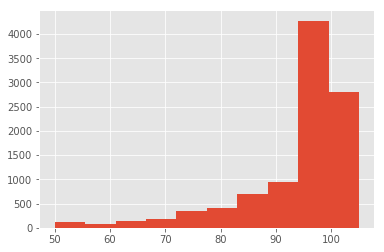

In [249]:
# Age of death distribution
aaa = []
for i in range(10000):
    aaa.append(50 + data_list.searchsorted(scipy.random.uniform(0, 1)))

plt.hist(aaa)

In [281]:
def simulate_retirement(data, data_list):
    age = 50
    current_invested = 150000
    
    age_of_death = 50 + data_list.searchsorted(scipy.random.uniform(0, 1))
    
    for i in range(55):
        # more investments
        if age < 70:
            current_invested += 10000
        
        # interest
        interest_rate = np.random.normal(0.08, 0.09)
        current_invested *= (1 + interest_rate)
        
        # withdrawal
        if age >= 70:
            current_invested -= 65000
        
        # is she dead already?
        if age == age_of_death:
            return current_invested
        
        age += 1
        
    return current_invested

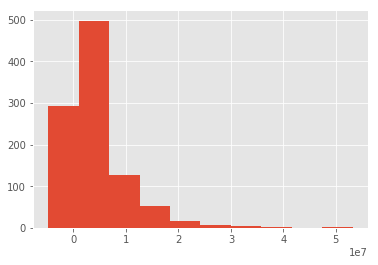

In [284]:
n_trials = 1000
money_left = []

for _ in range(n_trials):
    money_left.append(simulate_retirement(data, data_list))

plt.hist(money_left)
plt.show()